In [1]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('vgames2.csv')
df.rename(columns={'Unnamed: 0' : 'No'}, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16548 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
## 1. 데이터 전처리 작업

In [42]:
## 출하량 이상 데이터 처리하는 사용자 함수
def drop_ch(str):
    if 'K' in str:
        val = float(str.replace('K',''))
        val = val * 0.001
    elif 'M' in str:
        val = float(str.replace('M', ''))
    else :
        val = float(str)
    return val

In [39]:
## 출하량 데이터 형식 맞추기 작업
df['NA_Sales'] = df['NA_Sales'].apply(drop_ch)
df['EU_Sales'] = df['EU_Sales'].apply(drop_ch)
df['JP_Sales'] = df['JP_Sales'].apply(drop_ch)
df['Other_Sales'] = df['Other_Sales'].apply(drop_ch)

## 'Global_Sales' 열을 새로 만들어 줍니다.
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [512]:
## 장르가 미입력된 개소에 대해 구글링하여 직접 입력해주기
def nul_genre(df_input):
    df = df_input.copy()
    i = True 
    while i:
        print("종료하려면 0을 입력합니다.")
        num = int(input('바꾸려는 번호를 입력하세요'))
        if num == 0 : break
        
        print("바꾸려는 번호의 현재 정보는 아래와 같습니다.\n ")
        print('='*100)
        a = df[df['No'] == num]
        print(a[['No', 'Name', 'Genre']])
        print('='*100)
        print("\n\n")
        print('='*100)
        print('1 : "Sports", 2 : "Role-Playing", 3 : "Action", 4 : "Racing", 5 : "Shooter", 6 : "Misc" ')
        print('7 : "Adventure", 8 : "Puzzle", 9: "Simulation", 10: "Platform", 11 : "Strategy", 12 : "Fighting" ')  
        print('='*100)
        print("\n")
        gen = int(input('바꾸려는 장르를 선택해주세요'))
        
        if gen == 0: break
        gen_dic = {1 : "Sports", 2 : "Role-Playing", 3 : "Action", 4 : "Racing", 5 : "Shooter", 6 : "Misc", 7 : "Adventure", 8 : "Puzzle", 9: "Simulation", 10: "Platform", 11 : "Strategy", 12 : "Fighting"}
        df['Genre'].mask(df['No'] == num, gen_dic[gen], inplace=True)
        
        print("\n현재 Genre 가 Null 인 상위 5개 항목들 : ")    
        a =df[df['Genre'].isnull()]
        print(a[['No', 'Name', 'Genre']].head())
    return df

df = nul_genre(df)

In [518]:
## 출시 년도가 누락된 항목에 대해 구글링하여 입력해주기
def nul_year(df_input):
    df = df_input.copy()
    i = True 
    while i:
        print("종료하려면 0을 입력합니다.")
        num = int(input('바꾸려는 번호를 입력하세요'))
        if num == 0 : break
        
        print("바꾸려는 번호의 현재 정보는 아래와 같습니다.\n ")
        print('='*100)
        a = df[df['No'] == num]
        print(a[['No', 'Name', 'Year']])
        print('='*100)
        
        year = float(input('발매 년도를 입력하세요'))
        
        if year == 0.0: break
        df['Year'].mask(df['No'] == num, year, inplace=True)
        
        print("\n현재 Year 가 Null 인 상위 5개 항목들 : ")    
        a =df[df['Year'].isnull()]
        print(a[['No', 'Name', 'Year']].head())
    return df
df = nul_year(df)

In [81]:
## 'Year' 열 잘못된 값만 따로 분리하기
df_wy = df_n[df_n['Year']<1950]
df_gy = df_n[df_n['Year']>=1950]

In [82]:
## 'Year'열 잘못된 값 수정한후 다시 합치기
def wrong_year(float_input):
    num = float_input
    if num >30:
        num += 1900
    elif num <=30:
        num += 2000
    return num
df_wy['Year'] = df_wy['Year'].apply(wrong_year)

df = pd.DataFrame(np.concatenate((df_gy, df_wy)))

In [44]:
# 데이터 전처리 완료, 결측치 제거한 파일 저장
# df.to_csv('df_vgame.csv')

In [ ]:
## 2. 지역별 Genre 선호도 차이 있는지 알아보자

In [46]:
## 'Genre' 를 기준으로 grouping 실시
df = pd.read_csv("vgames_n2.csv")
df_region = df.groupby(by='Genre').sum()
df_region = df_region[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_region

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          875.99    523.33    158.64       186.70
Adventure       106.90     64.57     53.07        16.98
Fighting        223.59    101.32     87.35        36.68
Misc            410.28    216.02    108.20        75.33
Platform        446.44    201.61    130.70        51.53
Puzzle          123.69     50.73     56.87        12.54
Racing          359.39    238.39     56.69        77.27
Role-Playing    328.63    189.36    352.67        60.19
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.35     63.72        31.51
Sports          683.38    376.85    135.37       134.97
Strategy         68.75     45.33     49.46        11.36

<AxesSubplot:>

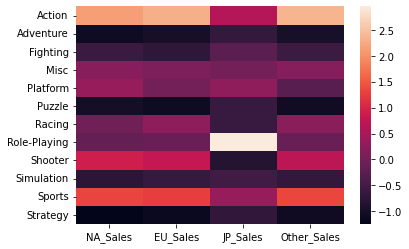

In [56]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Standard Scale 후 Heat map 그리기
def myScale(df_input):
        df = df_input.copy()
        data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
        ind = df.index.tolist()
        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
        data_scaled.index = ind
        return data_scaled

df_region_scaled = myScale(df_region)
sns.heatmap(df_region_scaled)

array([<AxesSubplot:xlabel='Genre'>, <AxesSubplot:xlabel='Genre'>,
       <AxesSubplot:xlabel='Genre'>, <AxesSubplot:xlabel='Genre'>],
      dtype=object)

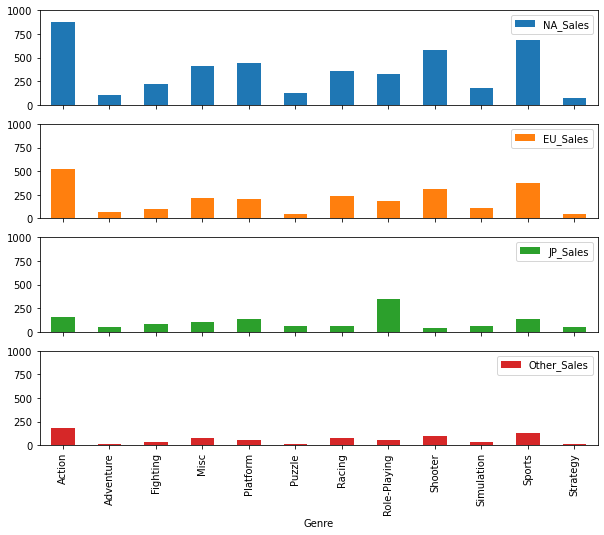

In [57]:
## 지역별 출하량 그래프 Subplot 으로 그리기
df_region.plot(kind= 'bar', subplots=True, figsize = (10,8), title = ['','','',''], ylim=(0,1000))

<AxesSubplot:xlabel='Genre'>

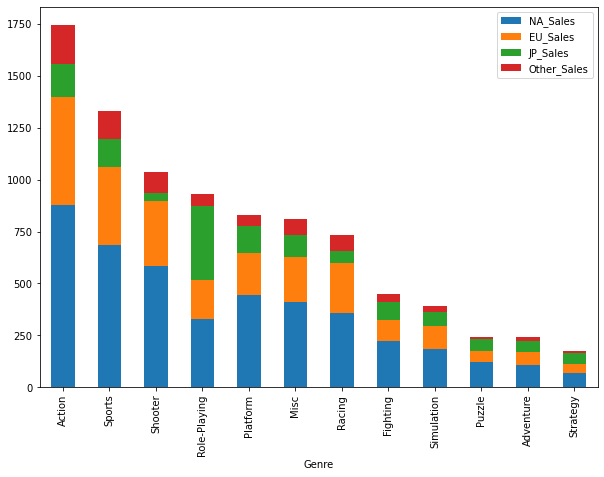

In [54]:
## 장르별 Global 출하량 그래프 그리기
df_region2 = df.groupby(by='Genre').sum()
df_region2 = df_region2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_region2 = df_region2.sort_values(by='Global_Sales', axis=0, ascending=False)
df_region2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot.bar(stacked=True, figsize=(10,7))

In [545]:
df_group2['Genre'].unique()

array(['Action', 'Shooter', 'Puzzle', 'Sports', 'Adventure', 'Misc',
       'Racing', 'Fighting', 'Platform', 'Simulation', 'Role-Playing',
       'Strategy'], dtype=object)

In [546]:
def genre(df):
    df_n = df.copy()
    genre = ['Action', 'Shooter', 'Puzzle', 'Sports', 'Misc', 'Fighting',
       'Racing', 'Adventure', 'Platform', 'Simulation', 'Role-Playing',
       'Strategy']
    a = []
    for i in genre:
        df_g = df_n[df_n['Genre'] == i]
        a.append(df_g)
    return a

In [547]:
a = genre(df_group2)

In [548]:
Action = a[0]
Shooter = a[1]
Puzzle = a[2]
Sports = a[3]
Misc = a[4]
Fighting = a[5]
Racing = a[6]
Adventure = a[7]
Platform = a[8]
Simulation = a[9]
Role_Playing = a[10]
Strategy = a[11]

In [550]:
Action = Action.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Action'})
Shooter = Shooter.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Shooter'})
Puzzle = Puzzle.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Puzzle'})
Sports = Sports.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Sports'})
Misc = Misc.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Misc'})
Fighting = Fighting.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Fighting'})
Racing = Racing.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Racing'})
Adventure = Adventure.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Adventure'})
Platform = Platform.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Platform'})
Simulation = Simulation.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Simulation'})
Role_Playing = Role_Playing.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Role_Playing'})
Strategy = Strategy.groupby('Year').sum().rename(columns = {'Global_Sales' : 'Strategy'})

In [58]:
## 2. 연도별 게임 트렌드가 있을까?

In [62]:
## K-Means Clustering 이용해 Period 4 구간으로 나누기

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_copy = df[['Year', 'Global_Sales']]
df_scaled = pd.DataFrame(scale.fit_transform(df_copy), columns = ['Year', 'Global_Sales'])

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=42)
km.fit(df_scaled)
labels = km.labels_
old_year = df_copy['Year'].tolist()
df_scaled['label'] = labels
df_scaled['Old_year'] = old_year
df_scaled

Year  Global_Sales  label  Old_year
0     -0.917503      0.214028      2    2001.0
1      0.446222     -0.113924      0    2009.0
2     -0.747038      0.406941      2    2002.0
3      1.128085      0.458385      0    2013.0
4      0.787153     -0.158937      0    2011.0
...         ...           ...    ...       ...
16593 -0.747038     -0.261824      2    2002.0
16594  1.469016     -0.248964      0    2015.0
16595 -2.110763     -0.332559      2    1994.0
16596  0.275756     -0.338990      0    2008.0
16597 -1.087969     -0.332559      2    2000.0

[16598 rows x 4 columns]

In [63]:
## 나눈 Cluster 별로 dataframe 뽑아내기
df_1995 =df[(df['Year']>=1977) & (df['Year']<=1995) ]
df_2004 =df[(df['Year']>=1996) & (df['Year']<=2004) ]
df_2011 =df[(df['Year']>=2005) & (df['Year']<=2011) ]
df_2016 =df[(df['Year']>=2012) ]

In [64]:
df_1995 = df_1995.groupby('Genre').sum()
df_2004 = df_2004.groupby('Genre').sum()
df_2011 = df_2011.groupby('Genre').sum()
df_2016 = df_2016.groupby('Genre').sum()


In [65]:
df_1995 = df_1995.reset_index()
df_2004 = df_2004.reset_index()
df_2011 = df_2011.reset_index()
df_2016 = df_2016.reset_index()


In [66]:
df_period = df_1995.drop(['Unnamed: 0.1', 'No', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [67]:
df_period.rename(columns ={'Global_Sales' : 'Period_1'}, inplace=True)

In [68]:
df_period.drop('Period_1', axis=1, inplace=True)

In [70]:
df_period.drop('Unnamed: 0', axis=1, inplace=True)

In [71]:
df_period['period_1'] = df_1995['Global_Sales'] / df_1995['Global_Sales'].sum() * 100
df_period['period_2'] = df_2004['Global_Sales'] / df_2004['Global_Sales'].sum() * 100
df_period['period_3'] = df_2011['Global_Sales'] / df_2011['Global_Sales'].sum() * 100
df_period['period_4'] = df_2016['Global_Sales'] / df_2016['Global_Sales'].sum() * 100


In [72]:
df_period

Genre   period_1   period_2   period_3   period_4
0         Action  10.239545  16.691889  19.277126  30.878804
1      Adventure   3.299175   2.453143   2.997490   2.026695
2       Fighting   7.308699   6.832782   4.095653   3.170671
3           Misc   3.272866   5.772301  13.319636   6.067984
4       Platform  30.376616  11.105352   5.968689   4.317494
5         Puzzle  11.211671   1.727112   2.627703   0.356647
6         Racing   4.931662  12.638755   7.460009   3.826304
7   Role-Playing   7.482340  12.303170   8.846893  13.195942
8        Shooter  10.665755   7.812299  11.281060  20.350240
9     Simulation   1.711414   4.001301   5.827493   2.401851
10        Sports   7.892764  15.557254  16.655022  12.473394
11      Strategy   1.607493   3.104641   1.643227   0.933974

In [73]:
df_p = df_period.set_index('Genre')

In [74]:
df_p['_'] = 0

<AxesSubplot:>

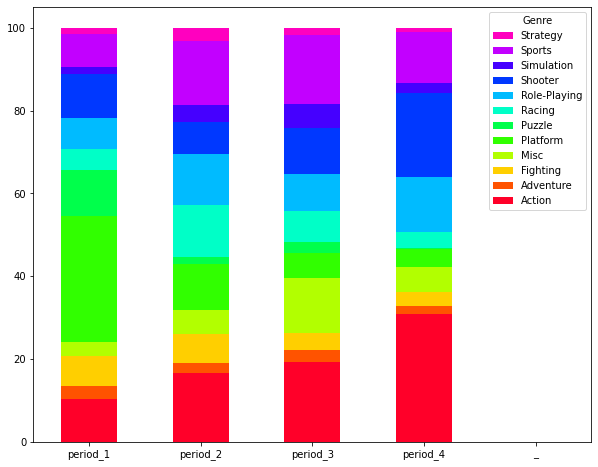

In [75]:
df_p.T.plot(stacked=True, kind='bar', figsize= (10,8), rot=0, colormap='gist_rainbow', legend='reverse')

In [668]:
df_2016

Genre  Unnamed: 0.1       No       Year  NA_Sales  EU_Sales  \
0         Action       8001367  8002341  1961449.0    172.46    158.67   
1      Adventure       2346590  2346871   565883.0      8.45      9.16   
2       Fighting        861957   862064   215469.0     19.61     10.98   
3           Misc       1557777  1557956   360462.0     38.04     26.84   
4       Platform        660468   660551   167135.0     25.25     21.28   
5         Puzzle        211626   211655    58385.0      1.16      1.45   
6         Racing        896865   896977   225551.0     16.75     27.48   
7   Role-Playing       3136146  3136511   735038.0     60.59     47.24   
8        Shooter       1742036  1742258   447047.0    134.73    107.23   
9     Simulation        590955   591029   149009.0      7.84     13.22   
10        Sports       2342361  2342624   529657.0     78.43     66.74   
11      Strategy        634922   634994   144997.0      4.17      5.02   

    JP_Sales  Other_Sales  Global_Sales  
0      50.99        51.65        433.77  
1       7.99         2.87         28.47  
2       9.30         4.65         44.54  
3      12.51         7.85         85.24  
4       8.58         5.54         60.65  
5       2.14         0.26          5.01  
6       2.49         7.03         53.75  
7      62.73        14.81        185.37  
8       8.73        35.18        285.87  
9      10.31         2.37         33.74  
10      7.86        22.19        175.22  
11      2.80         1.13         13.12

In [ ]:
## 3. 출고량이 높은 게임에 대한 분석과 시각화

In [76]:
## Console 만 분리해내기
df_console = df[df['Platform'] != 'PC'].sort_values(by='Global_Sales', ascending=False)
df_console.head()

Unnamed: 0  Unnamed: 0.1     No                      Name Platform  \
1158        1158          2908   2909                Wii Sports      Wii   
1658        1658          4199   4200         Super Mario Bros.      NES   
5002        5002         12579  12580            Mario Kart Wii      Wii   
1328        1328          3352   3353         Wii Sports Resort      Wii   
3142        3142          7829   7830  Pokemon Red/Pokemon Blue       GB   

        Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
1158  2006.0        Sports  Nintendo     41.49     29.02      3.77   
1658  1985.0      Platform  Nintendo     29.08      3.58      6.81   
5002  2008.0        Racing  Nintendo     15.85     12.88      3.79   
1328  2009.0        Sports  Nintendo     15.75     11.01      3.28   
3142  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22   

      Other_Sales  Global_Sales  
1158         8.46         82.74  
1658         0.77         40.24  
5002         3.31         35.83  
1328         2.96         33.00  
3142         1.00         31.38

In [77]:
## GTA 시리즈만 분리해내기
df_GTA = df_console[df_console['Name'].str.contains('Grand Theft Auto')]
df_GTA['Global_Sales'].sum()

158.64000000000001

In [78]:
## 데이터 정규화 하기
from sklearn.preprocessing import StandardScaler

def myScale(df_input):
        df = df_input.copy()
        data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
        scaler = StandardScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
        return data_scaled
    
df_GTA_Scaled = myScale(df_GTA)

In [79]:
## GTA 출하량에 지역별 차이가 없음을 검증 (ANOVA)

from scipy import stats
print("귀무가설(f0) : GTA 의 북미 판매량 평균, 유럽 판매량 평균, Global 판매량 평균에는 차이가 없을 것이다.")
print("대안가설(f1) : GTA 의 북미 판매량 평균, 유럽 판매량 평균, Global 판매량 평균에는 차이가 있을 것이다.\n")

F, p = stats.f_oneway(df_GTA_Scaled['NA_Sales'], df_GTA_Scaled['EU_Sales'], df_GTA_Scaled['JP_Sales'], df_GTA_Scaled['Other_Sales'], df_GTA_Scaled['Global_Sales'])

if p > 0.05 :
    print('p value 가 {0:.2f} 로 0.05보다 크므로 재귀가설을 기각할 수 없습니다.'.format(p))
else:
    print('p value 가 {0:.2f} 로 0.05보다 작아 재귀가설을 기각합니다.'.format(p))

귀무가설(f0) : GTA 의 북미 판매량 평균, 유럽 판매량 평균, Global 판매량 평균에는 차이가 없을 것이다.
대안가설(f1) : GTA 의 북미 판매량 평균, 유럽 판매량 평균, Global 판매량 평균에는 차이가 있을 것이다.

p value 가 1.00 로 0.05보다 크므로 재귀가설을 기각할 수 없습니다.


<AxesSubplot:>

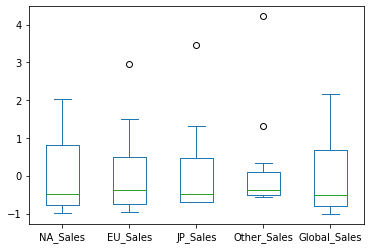

In [80]:
## Scale 된 데이터로 Box plot 그려보기 (ANOVA 검증을 시각화)
df_GTA_sales = df_GTA_Scaled[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_GTA_sales.plot(kind='box')

<AxesSubplot:xlabel='Year'>

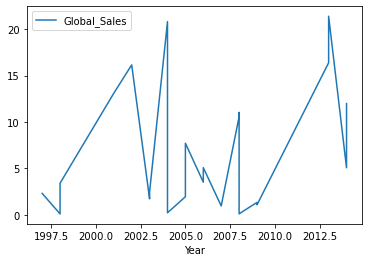

In [81]:
## 연도별 GTA 출하량 추이 그래프 그리기
df_GTA=df_GTA.sort_values(by='Year')
df_2 = df_GTA[['Year', 'Global_Sales']]
df_2 = df_2.set_index('Year')
df_2.plot(kind='line')

In [485]:
df['Platform'].unique()
portable = ['PSP', 'PSV', 'GB', 'GBA', 'GC', 'DS', '3DS', 'GG', 'WS']
hold = ['PS', 'PS2', 'PS3', 'PS4', 'SNES', 'NES', 'N64', 'Wii', 'WiiU', 'XB', 'X360', 'XOne', 'GEN', 'SAT', 'SCD', 'DC', 'TG16', 'PCFX', 'NG', '3DO', '2600']
pc = ['PC']
df_port = df[df['Platform'].isin(portable)]
df_hold = df[df['Platform'].isin(hold)]
df_pc = df[df['Platform'].isin(pc)]

In [82]:
## 각 Platform 별 점유율 알아보기

sony = ['PS', 'PS2', 'PS3', 'PS4']
MS = ['XB', 'X360', 'XOne']
NTD = ['SNES', 'NES', 'N64', 'Wii', 'WiiU']
etc = ['GEN', 'SAT', 'SCD', 'DC', 'TG16', 'PCFX', 'NG', '3DO', '2600']

df_sony = df[df['Platform'].isin(sony)]
df_ms = df[df['Platform'].isin(MS)]
df_ntd = df[df['Platform'].isin(NTD)]
df_etc = df[df['Platform'].isin(etc)]

sony_sum = df_sony['Global_Sales'].sum()
ms_sum = df_ms['Global_Sales'].sum()
ntd_sum = df_ntd['Global_Sales'].sum()
etc_sum = df_etc['Global_Sales'].sum()


<AxesSubplot:ylabel='Sales'>

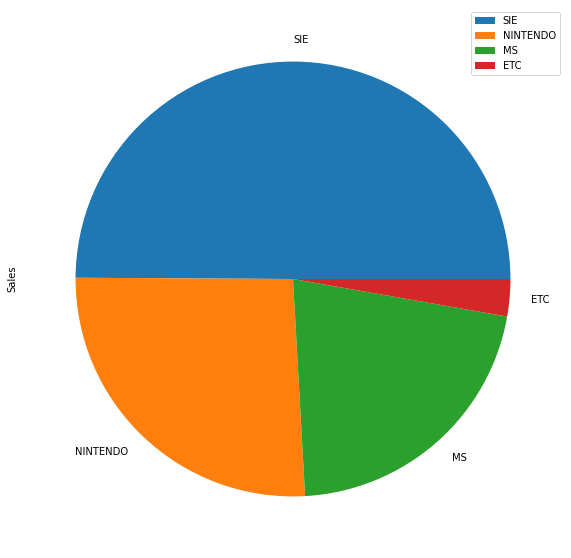

In [84]:
## Platform 별 점유율 Pie plot 으로 그리기
share = pd.DataFrame({'SIE' : [3222.66], 'NINTENDO' : [1677.61], 'MS' : [1378.44], 'ETC' : [178.46]})
share = share.T
share.columns = ['Sales']
share.plot.pie(y='Sales', figsize=(10,10))